<a href="https://colab.research.google.com/github/marcinwolter/ANOVA_2019/blob/master/plot_digits_classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline


Simple visualization and classification of the digits dataset
=============================================================

Plot the first few samples of the digits dataset and a 2D representation
built using PCA, then do a simple classification



In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

Plot the data: images of digits
-------------------------------

Each data in a 8x8 image



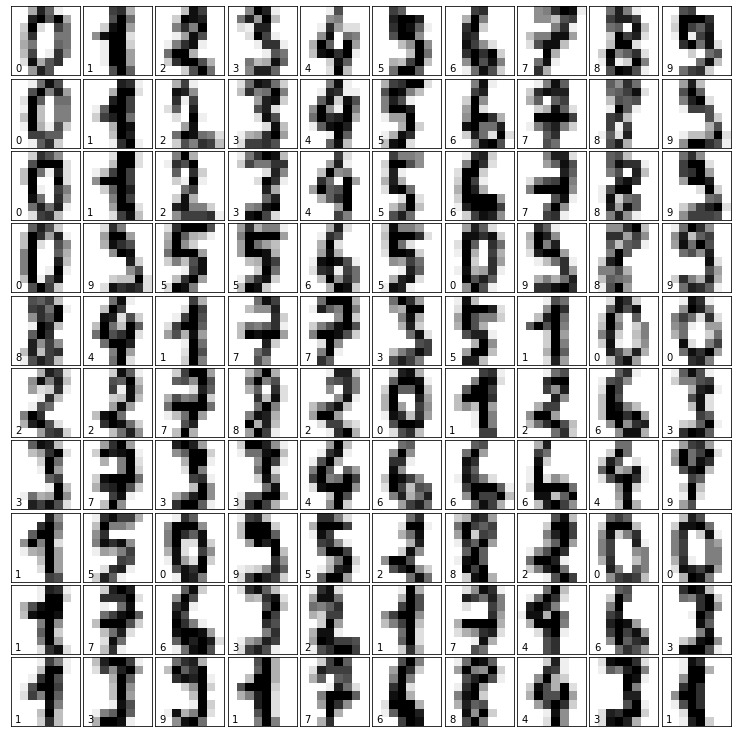

In [29]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Plot a projection on the 2 first principal axis
------------------------------------------------



(1797, 2)


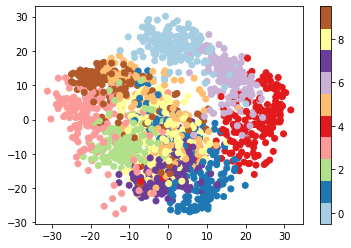

In [30]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
print(proj.shape)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target.astype(int), cmap=plt.get_cmap('Paired', 10), vmin=-0.5, vmax=9.5)
plt.colorbar()

## **Principal Component Analysis**
----------------------------------



In [0]:

pca = PCA(n_components=64)



# **Quantify the performance**




In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
init = np.random.randint(0,1000)
X_train, X_test, y_train, y_test = train_test_split(pca.fit_transform(digits.data)[:,0:12], digits.target, random_state=init)




## **Classify with Naive Bayes Classifies / Fisher Linear Discriminants**

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Score =  0.9881217520415738


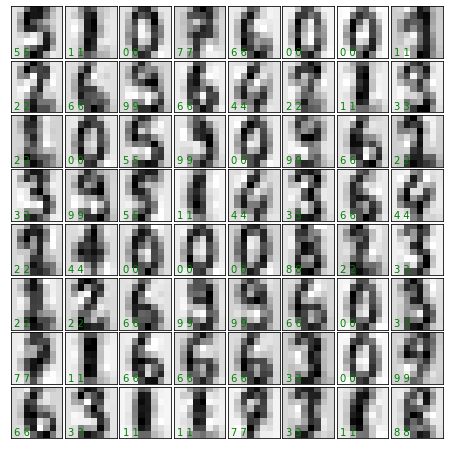

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


# train the model
#clf = GaussianNB()
#clf = LinearDiscriminantAnalysis()
clf = KNeighborsClassifier(5)

print(clf.fit(X_train, y_train))
#print(clf.feature_importances_)  

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test


print("Score = ",clf.score(X_train, y_train))

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# split the data into training and validation sets
pca = PCA(n_components=12)
XP_train, XP_test, yP_train, yP_test = train_test_split(pca.inverse_transform(pca.fit_transform(digits.data)), digits.target, random_state=init)
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(XP_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='red')

# **Plot principal components**

In the plot above first label is the expected (true) digit, second the reconstructed digit


[179.0069301  163.71774688 141.78843909 101.10037518  69.51316524
  59.10852245  51.88453606  44.01505337  40.31082748  37.01173558
  28.5166762   27.31953128]


<BarContainer object of 12 artists>

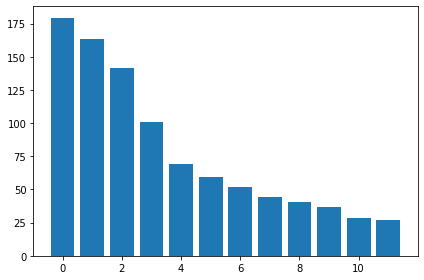

In [34]:

principal = pca.explained_variance_
print(pca.explained_variance_)

fig, ax = plt.subplots(tight_layout=True)
ax.bar( [x for x in range(principal.size)], principal)


In [35]:
matches = (predicted == expected)
print(matches.sum())

435


The total number of data points



In [36]:
print(len(matches))

450


And now, the ratio of correct predictions



In [37]:
matches.sum() / float(len(matches))

0.9666666666666667

Print the classification report



In [38]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.88      1.00      0.94        37
           2       1.00      1.00      1.00        42
           3       0.98      0.96      0.97        48
           4       1.00      1.00      1.00        43
           5       0.96      0.98      0.97        45
           6       0.96      1.00      0.98        47
           7       0.96      1.00      0.98        48
           8       0.97      0.81      0.88        42
           9       0.96      0.92      0.94        50

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [39]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

[[48  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  1  0  1  0  0]
 [ 0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  5  0  0  0  0  1  0 34  2]
 [ 0  0  0  1  0  1  0  1  1 46]]
